# Visual Test of Game of Life

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
from IPython.display import HTML

from game_of_life import GameOfLife

## Animation

In [2]:
def create_glider(size=(20, 20), position=(1, 1)):
    """Create a glider pattern at the specified position."""
    board = np.zeros(size, dtype=int)
    row, col = position
    
    # Glider pattern
    board[row, col+1] = 1
    board[row+1, col+2] = 1
    board[row+2, col] = 1
    board[row+2, col+1] = 1
    board[row+2, col+2] = 1
    
    return board

def animate_game_better(game_instance, steps=50, interval=200):
    """
    Create a smooth animation of the Game of Life using Matplotlib's FuncAnimation.
    
    Parameters:
    - game_instance: An instance of GameOfLife
    - steps: Number of steps to animate
    - interval: Time between frames in milliseconds (default: 200ms)
    
    Returns:
    - HTML animation that can be displayed in the notebook
    """
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Create a color map (black for live cells, white for dead cells)
    cmap = ListedColormap(['white', 'black'])
    
    # Initial plot
    img = ax.imshow(game_instance.get_board(), cmap=cmap)
    ax.grid(True, which='both', color='gray', linewidth=0.5, alpha=0.3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Conway's Game of Life Animation")
    
    # Frame counter text
    frame_text = ax.text(0.02, 0.02, "Frame: 0", transform=ax.transAxes, 
                         color='red', fontsize=12)
    
    # Update function for animation
    def update(frame):
        # Update the game state
        if frame > 0:  # Skip the first frame to show initial state
            game_instance.next()
        
        # Update the image
        img.set_array(game_instance.get_board())
        
        # Update the frame counter
        frame_text.set_text(f"Frame: {frame}")
        
        return img, frame_text
    
    # Create the animation
    animation = FuncAnimation(fig, update, frames=steps, interval=interval, 
                              blit=True, repeat=False)
    
    # Close the figure to prevent display
    plt.close(fig)
    
    # Return HTML version for display in notebook
    return HTML(animation.to_jshtml())

# Example usage:
def run_glider_animation_smooth():
    # Create a game with a glider pattern
    game = GameOfLife(create_glider(size=(30, 30), position=(5, 5)))
    return animate_game_better(game, steps=40, interval=150)

def run_random_animation_smooth():
    # Create a game with a random initial state
    game = GameOfLife(size=(50, 50))
    game.random_board(density=0.3)
    return animate_game_better(game, steps=60, interval=100)

# To run the animation, execute one of these in a cell:
# run_glider_animation_smooth()
# run_random_animation_smooth()

In [3]:
# a random board
animation = run_random_animation_smooth()
display(animation)

In [4]:
# For a glider pattern
animation = run_glider_animation_smooth()
display(animation)

## Comparison

Comparing correct board with board containing errors:


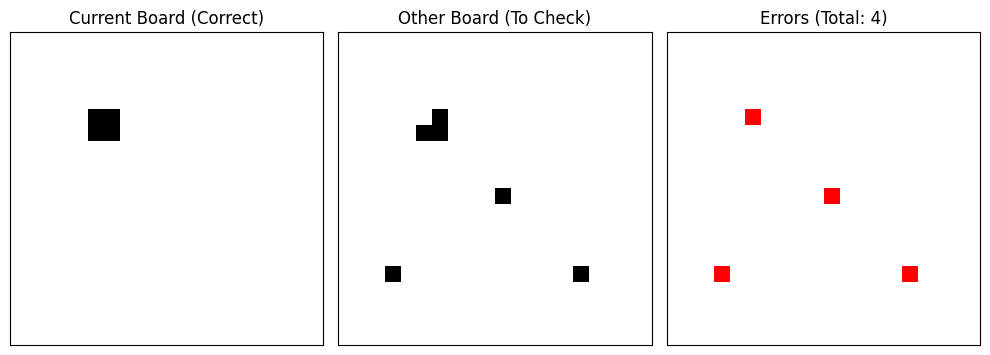

Total number of errors: 4
Locations of errors (row, col):
  Position (5, 5): Should be alive, but is dead
  Position (10, 10): Should be dead, but is alive
  Position (15, 3): Should be dead, but is alive
  Position (15, 15): Should be dead, but is alive


In [6]:
# Import the GameOfLife class
from game_of_life import GameOfLife
import numpy as np
import matplotlib.pyplot as plt

# Demo function to show the error highlighting feature
def demo_error_highlighting():
    # Create a game instance with a simple pattern
    game = GameOfLife(size=(20, 20))
    
    # Create a simple pattern (block)
    initial_board = np.zeros((20, 20))
    initial_board[5:7, 5:7] = 1  # 2x2 block
    game.set_board(initial_board)
    
    # Generate the correct next state
    correct_next = game.next()
    
    # Create a version with deliberate errors
    incorrect_next = correct_next.copy()
    
    # Add some errors (flip some cells)
    incorrect_next[5, 5] = 0  # Remove a cell that should be alive
    incorrect_next[10, 10] = 1  # Add a cell that should be dead
    incorrect_next[15, 15] = 1  # Add another cell that should be dead
    incorrect_next[15, 3] = 1  # Add another cell that should be dead
    
    # Set the board back to the correct state
    game.set_board(correct_next)
    
    # Display the comparison with errors highlighted
    print("Comparing correct board with board containing errors:")
    errors_board = game.display_errors(incorrect_next)
    
    print(f"Total number of errors: {np.sum(errors_board)}")
    print("Locations of errors (row, col):")
    error_locations = np.argwhere(errors_board == 1)
    for loc in error_locations:
        row, col = loc
        expected = "alive" if game.board[row, col] == 1 else "dead"
        actual = "alive" if incorrect_next[row, col] == 1 else "dead"
        print(f"  Position ({row}, {col}): Should be {expected}, but is {actual}")

# Run the demo
demo_error_highlighting()